## Time Series Forecast OKR

In [1]:
import warnings
from seffaflik.elektrik import tuketim
import seffaflik
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
seffaflik.Kimlik(istemci_taniticisi="abcdefg")

### Time Series Data
Zaman serileri, zamanla değişen verilerin kaydedildiği ve analiz edildiği istatistiksel veri setleridir. Bu veriler, belirli bir zamana bağlı olarak sıralanır ve genellikle eşit aralıklarla ölçülür. Zaman serileri analizi, gelecekteki değerleri tahmin etmek, trendleri ve desenleri ortaya çıkarmak, mevsimsel varyasyonları incelemek ve veri üzerinde yapısal değişiklikleri tespit etmek için kullanılır. Örneğin: Hava durumu, sıcaklık, yağış miktarı, borsa, satış ve stok verileri gibi

#### Trend
Trend, zaman serilerindeki uzun vadeli eğilimi ifade eder. Trend, verilerin artış, azalış veya istikrarlı bir şekilde değişme eğilimini gösterir. Örneğin, bir enerji tüketim verisi zaman serisindeki trend, yıllar geçtikçe artan veya azalan bir eğilimi yansıtabilir.
#### Mevsimsellik
Mevsimsellik, zaman serilerinde belirli bir dönemde tekrarlanan düzenli desenleri ifade eder. Mevsimsellik, genellikle yılın mevsimlerine veya aylara bağlı olarak ortaya çıkar. Örneğin, bir satış verisi zaman serisindeki mevsimsellik, her yıl aynı dönemlerde artan veya azalan satışları gösterebilir.

### Veri Analizi

### Elektrik Tüketimi Verisi
Elektrik tüketim verisi, enerji kullanımını analiz etmek ve enerji verimliliğini artırmak için önemlidir. Aynı zamanda elektrik ihale marketindeki tüketim verisi, enerji tedarikçileri ve alıcıları için stratejik kararlar almak ve rekabet avantajı elde etmek için önemlidir. Bu veriye Türkiye için EPİAŞ Şeffaflık platformundan ulaşılabilir.

In [3]:
df = tuketim.gerceklesen(baslangic_tarihi="2000-01-01",bitis_tarihi="2023-12-31")

In [4]:
df = tuketim.gerceklesen(baslangic_tarihi="2000-01-01",bitis_tarihi="2023-12-31")

In [5]:
df.head()

,Tarih,Saat,Tüketim
0,2015-12-31,0,29590.88
1,2015-12-31,1,27785.43
2,2015-12-31,2,26516.53
3,2015-12-31,3,26091.62
4,2015-12-31,4,25871.54


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70152 entries, 0 to 70151
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tarih    70152 non-null  datetime64[ns]
 1   Saat     70152 non-null  int64         
 2   Tüketim  70152 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1+ MB


In [7]:
df = df.rename(columns = {"Tüketim":"Consumption"})

In [8]:
df["Consumption"].describe()

count    70152.000000
mean     34422.611770
std       5710.532703
min          0.000000
25%      30178.300000
50%      34215.765000
75%      38530.865000
max      55575.020000
Name: Consumption, dtype: float64

In [9]:
df["datetime"] = pd.to_datetime(df["Tarih"].astype(str) + "-" + df["Saat"].astype(str),format = "%Y-%m-%d-%H")

### Görsel Analiz

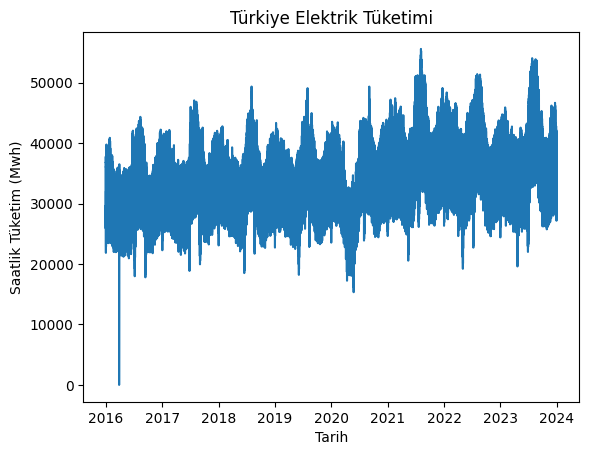

In [10]:
fig, ax = plt.subplots()
ax.plot(df["datetime"],df["Consumption"])
ax.set_title("Türkiye Elektrik Tüketimi")
ax.set_xlabel("Tarih")
ax.set_ylabel("Saatlik Tüketim (Mwh)")
plt.show()

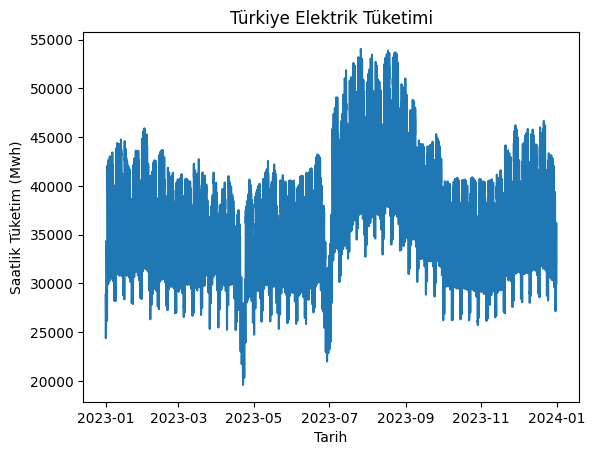

In [11]:
fig, ax = plt.subplots()
ax.plot(df.iloc[-24*365:]["datetime"],df.iloc[-24*365:]["Consumption"])
ax.set_title("Türkiye Elektrik Tüketimi")
ax.set_xlabel("Tarih")
ax.set_ylabel("Saatlik Tüketim (Mwh)")
plt.show()

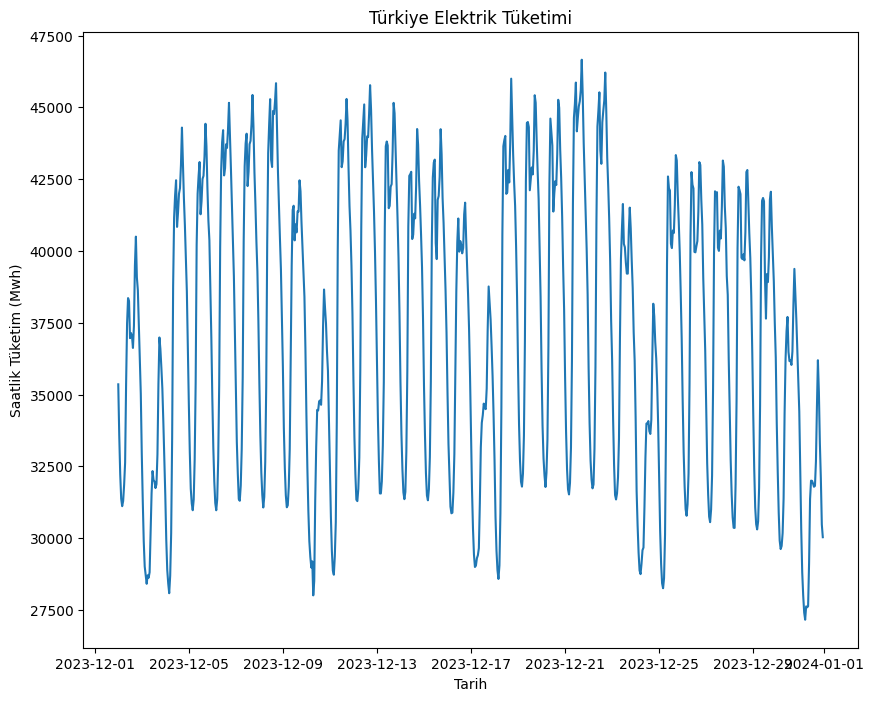

In [12]:
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(df.iloc[-24*30:]["datetime"],df.iloc[-24*30:]["Consumption"])
ax.set_title("Türkiye Elektrik Tüketimi")
ax.set_xlabel("Tarih")
ax.set_ylabel("Saatlik Tüketim (Mwh)")
plt.show()

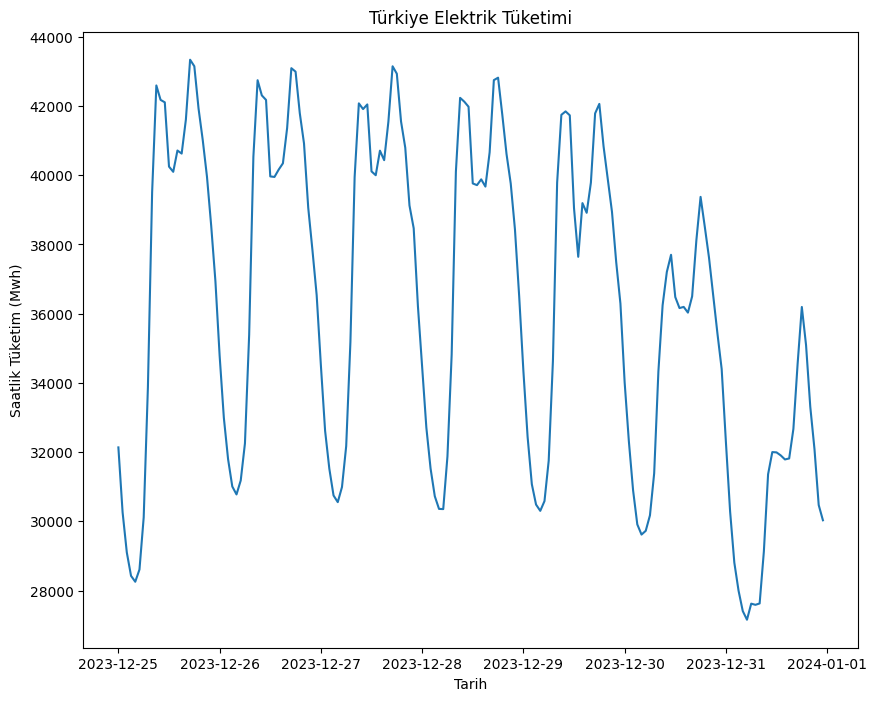

In [13]:
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(df.iloc[-24*7:]["datetime"],df.iloc[-24*7:]["Consumption"])
ax.set_title("Türkiye Elektrik Tüketimi")
ax.set_xlabel("Tarih")
ax.set_ylabel("Saatlik Tüketim (Mwh)")
plt.show()

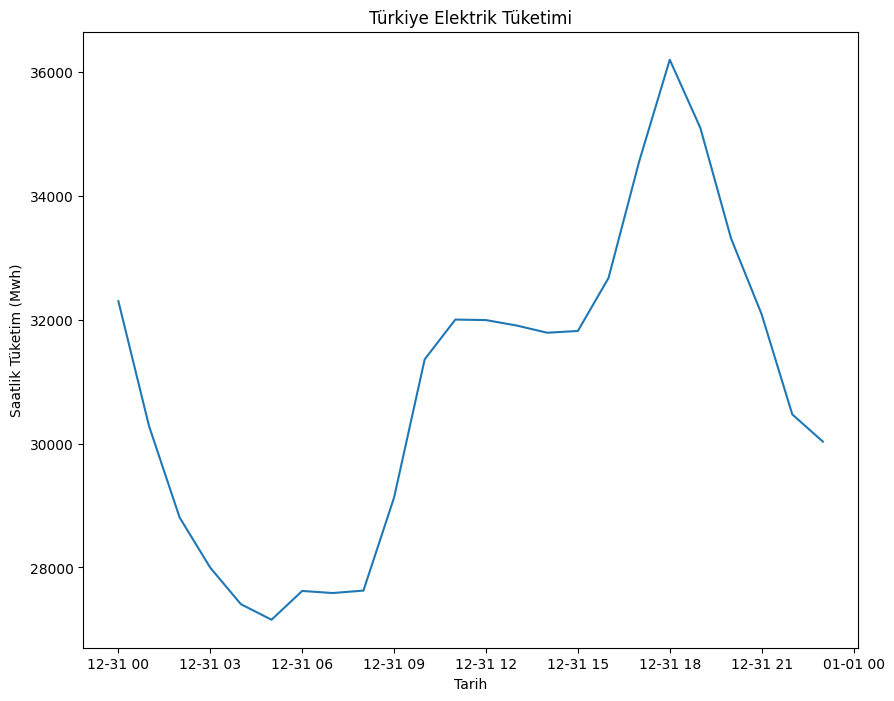

In [14]:
fig, ax = plt.subplots(figsize = (10,8))
ax.plot(df.iloc[-24:]["datetime"],df.iloc[-24:]["Consumption"])
ax.set_title("Türkiye Elektrik Tüketimi")
ax.set_xlabel("Tarih")
ax.set_ylabel("Saatlik Tüketim (Mwh)")
plt.show()

In [15]:
df["hour"] = df["datetime"].dt.hour
df["year"] = df["datetime"].dt.year
df["quarter"] = df["datetime"].dt.quarter
df["month"] = df["datetime"].dt.month
df["week"] = df["datetime"].dt.isocalendar().week
df["day"] = df["datetime"].dt.weekday

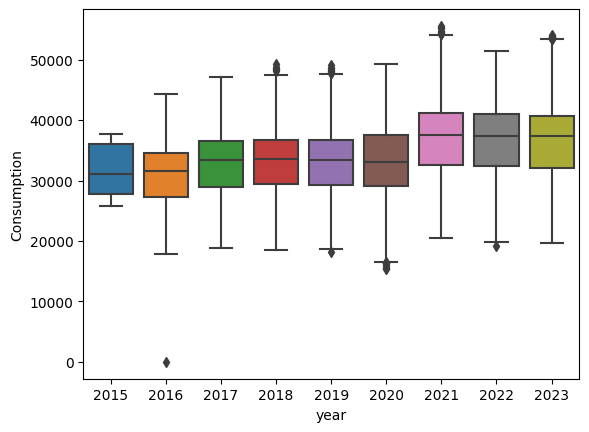

In [16]:
sns.boxplot(x = df["year"],y = df["Consumption"])
plt.show()

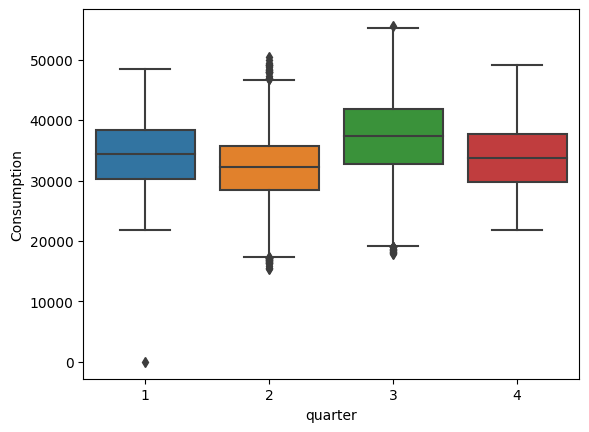

In [17]:
sns.boxplot(x = df["quarter"],y = df["Consumption"])
plt.show()

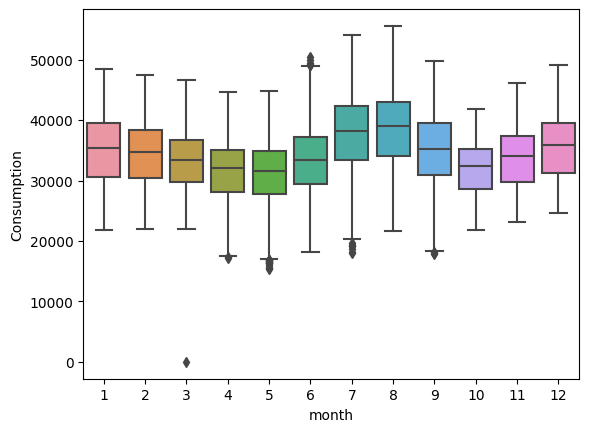

In [18]:
sns.boxplot(x = df["month"],y = df["Consumption"])
plt.show()

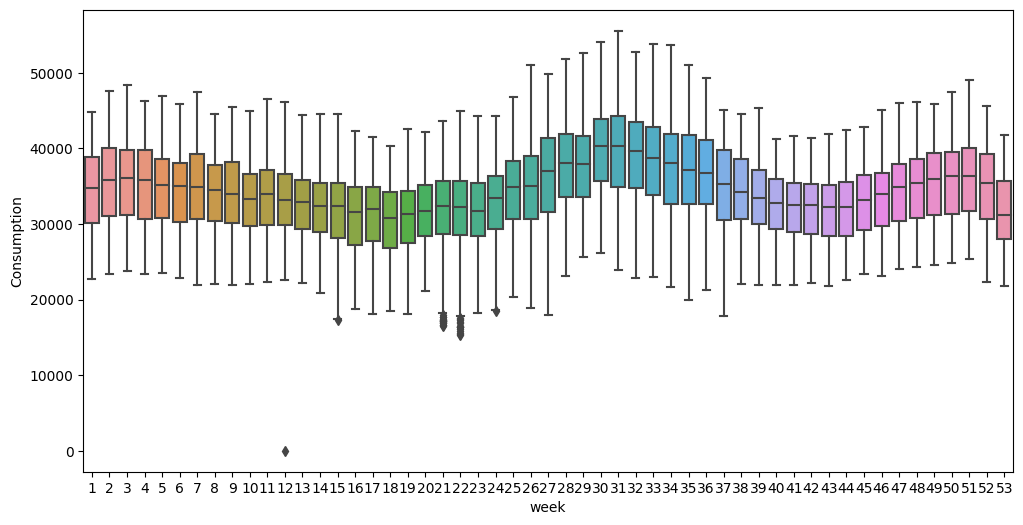

In [19]:
fig,ax = plt.subplots(figsize = (12,6))
sns.boxplot(x = df["week"],y = df["Consumption"])
plt.show()

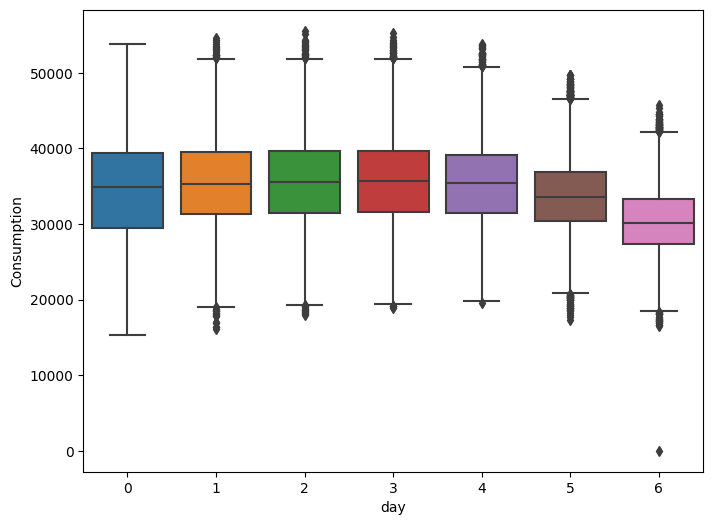

In [20]:
fig,ax = plt.subplots(figsize = (8,6))
sns.boxplot(x = df["day"],y = df["Consumption"])
plt.show()

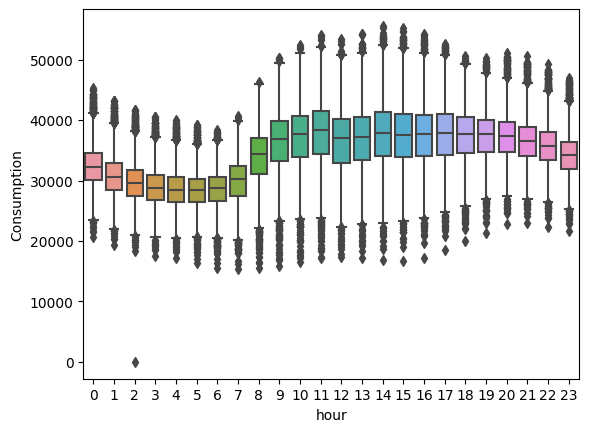

In [21]:
sns.boxplot(x = df["hour"],y = df["Consumption"])
plt.show()

In [22]:
df["trend"] = df.index.astype(int)

In [23]:
df["trend"]

0            0
1            1
2            2
3            3
4            4
         ...  
70147    70147
70148    70148
70149    70149
70150    70150
70151    70151
Name: trend, Length: 70152, dtype: int64

### Feature Seçimi, Model Eğitimi ve Sonuçlar

#### Linear Regresyon Nedir?

Lineer regresyon, bir bağımlı değişkenin bir veya daha fazla bağımsız değişken ile doğrusal bir ilişkisini modellemek için kullanılan bir istatistiksel yöntemdir. Temel formülü şu şekildedir: 

Y = β0 + X * β1

Burada:
- Y, bağımlı değişkendir.
- X, bağımsız değişkendir.
- β0, kesme noktası veya intercept değeridir.
- β1, eğim veya regresyon katsayısıdır.


In [24]:
def train_linear_regression(df,feature_cols,target_col,categoric_columns,split_date):
    features_df = df[feature_cols]
    features_df[categoric_columns] = features_df[categoric_columns].astype("category")
    
    X = pd.get_dummies(features_df,columns = categoric_columns)
    y = df[target_col]
    
    split_datetime = pd.to_datetime(split_date)
    
    train_idx = df[df["datetime"]<split_datetime].index
    test_idx = df[df["datetime"]>=split_datetime].index
    
    X_train = X.loc[train_idx]
    X_test = X.loc[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]
    
    linear_reg = LinearRegression().fit(X_train,y_train)
    y_preds = linear_reg.predict(X_test)
    y_fit = linear_reg.predict(X_train)
    
    r2_score = linear_reg.score(X_train,y_train)
    
    fig, ax = plt.subplots(nrows=2,figsize = (10,8))
    ax[0].plot(df.loc[train_idx,"datetime"],df.loc[train_idx,"Consumption"])
    ax[0].plot(df.loc[train_idx,"datetime"],y_fit)
    ax[0].set_title(f"Actual vs Fit in Train Period (Before {split_date})")
    ax[0].legend(["Actual","Fit"])
    ax[1].plot(df.loc[test_idx,"datetime"],df.loc[test_idx,"Consumption"])
    ax[1].plot(df.loc[test_idx,"datetime"],y_preds)
    ax[1].set_title(f"Actual vs Predicted in Test Period (After {split_date})")
    
    plt.show()
    
    mape = mean_absolute_percentage_error(y_test,y_preds)*100
    print(f"Average Percentage Error in Test Period: {mape:.2f}%")
    print(f"R^2 Score: {r2_score:.2f}")

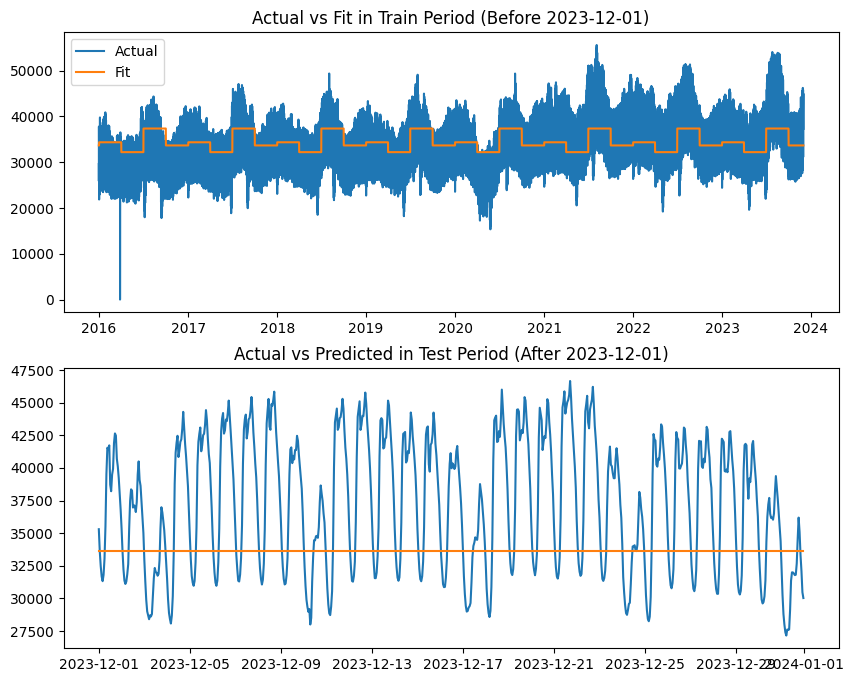

Average Percentage Error in Test Period: 13.29%
R^2 Score: 0.11


In [25]:
train_linear_regression(df,["quarter"],"Consumption",["quarter"],"2023-12-01")

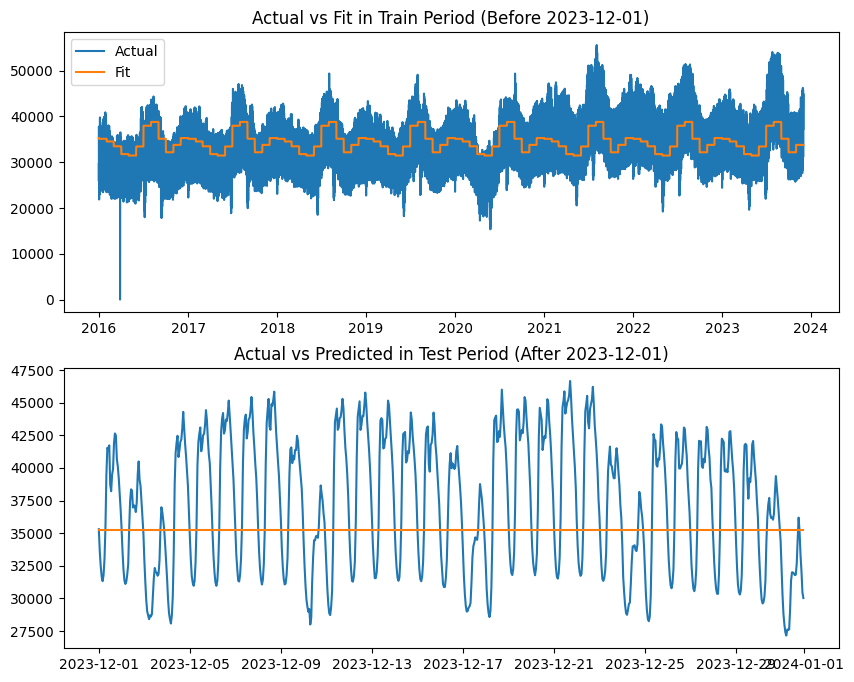

Average Percentage Error in Test Period: 12.43%
R^2 Score: 0.15


In [26]:
train_linear_regression(df,["quarter","month"],"Consumption",["quarter","month"],"2023-12-01")

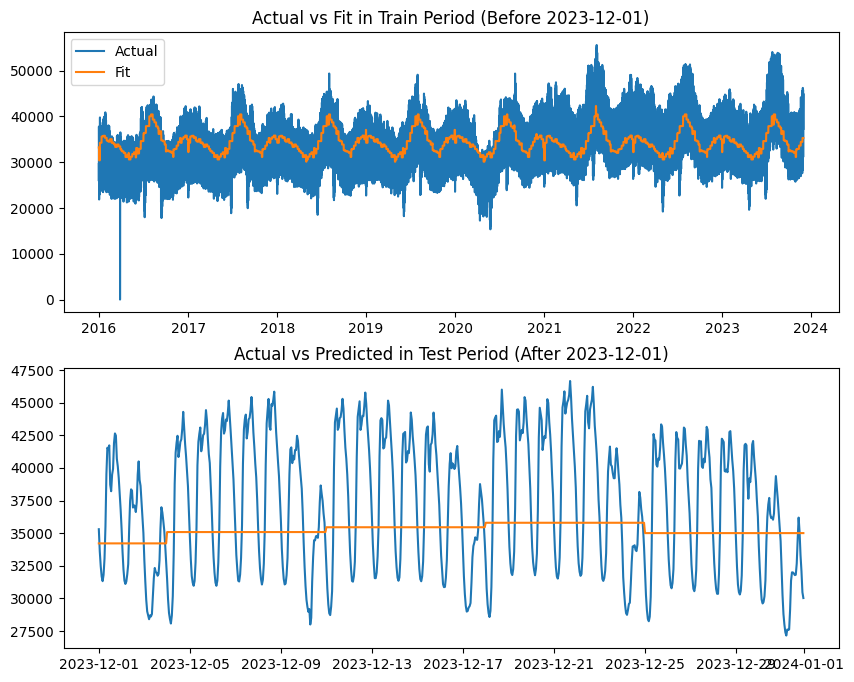

Average Percentage Error in Test Period: 12.38%
R^2 Score: 0.17


In [27]:
train_linear_regression(df,["quarter","month","week"],"Consumption",["quarter","month","week"],"2023-12-01")

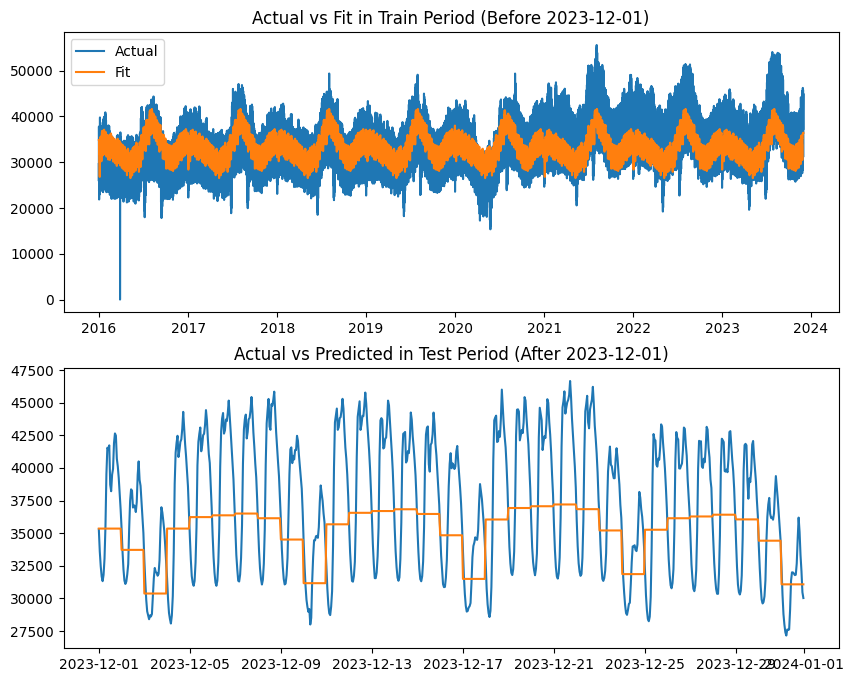

Average Percentage Error in Test Period: 11.60%
R^2 Score: 0.26


In [28]:
train_linear_regression(df,["quarter","month","week","day"],"Consumption",["quarter","month","week","day"],"2023-12-01")

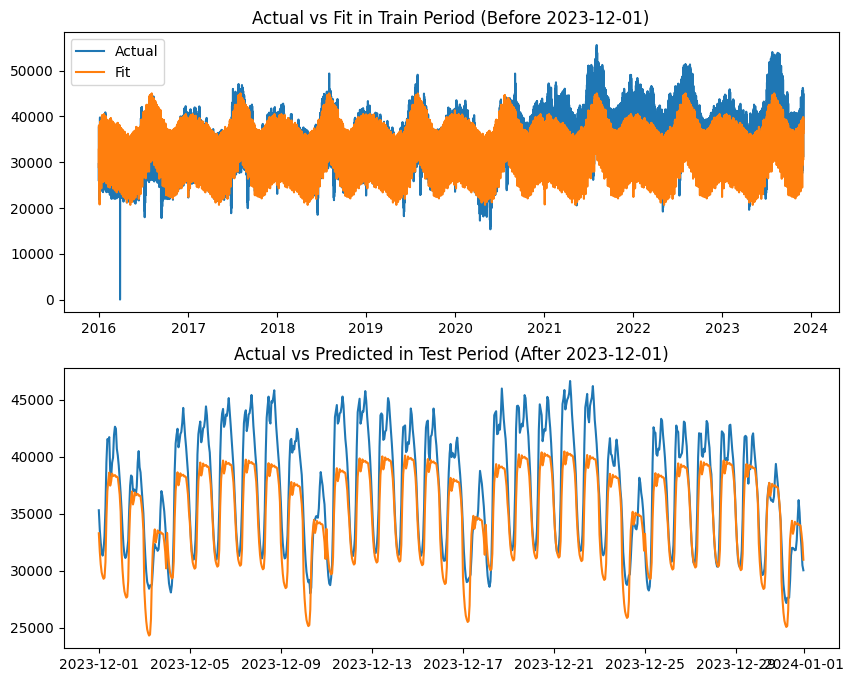

Average Percentage Error in Test Period: 6.56%
R^2 Score: 0.64


In [29]:
train_linear_regression(df,["quarter","month","week","day","hour"],"Consumption",["quarter","month","week","day","hour"],"2023-12-01")

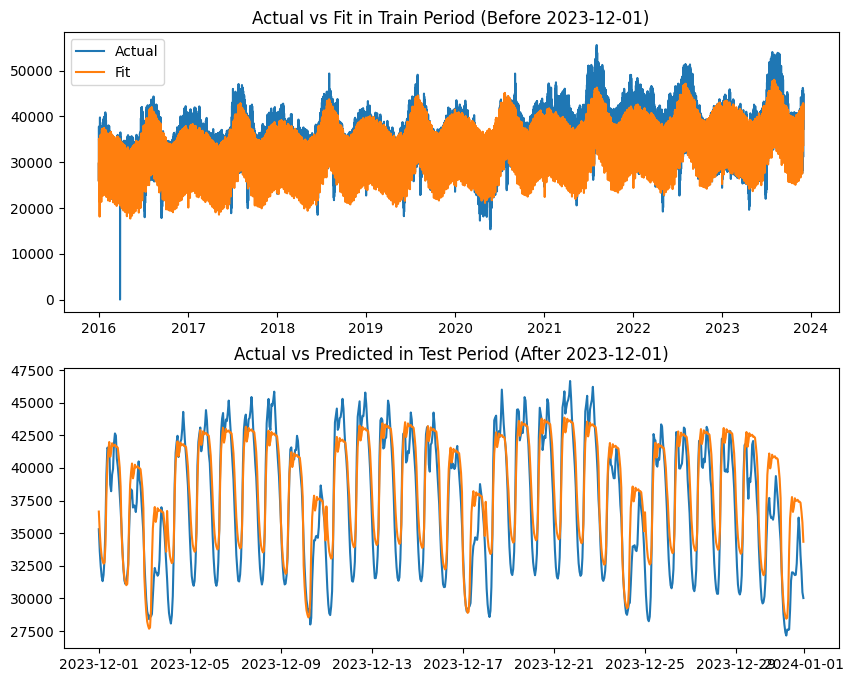

Average Percentage Error in Test Period: 5.16%
R^2 Score: 0.76


In [30]:
train_linear_regression(df,["quarter","month","week","day","hour","trend"],"Consumption",["quarter","month","week","day","hour"],"2023-12-01")

### Sonuç
    Türkiye saatlik elektrik tüketim verisi çokça sezonsallık barındıran bir verisetidir. Bu verisetini tahmin etmek için sezonsal analiz ve featurelar gerekir. Bu verisetini tahminlerken verimi ve performansı yüksek olan modellerden biri linear regresyon modelidir. Her ne kadar sonuçlar iyileşmiş gibi gözükse de bu çalışmamızı belli adımlarla daha da geliştirebiliriz.

### Gelecek Adımlar
    Tahminlerin kötü olduğu dönemler belirlenip root cause araştırılabilir ve bu bilgi modele eklenebilir.
    Farklı modeller denenebilir: Decision Tree, Random Forest, Gradient Boosting ve LSTM gibi.
    Potansiyel etkileyici olabilecek feature'lar eklenebilir. Tatil günleri, okul açılış günleri gibi.
    Verinin kısa dönemli geçmiş kısımlarını modele ekleyebiliriz.
    